In [1]:
import numpy as np
import pandas as pd
from causal_impact import CausalImpact
from statsmodels.tsa.statespace.structural import UnobservedComponents
import matplotlib.pyplot as plt

% matplotlib inline

/Users/ramoniglesias/development/cs341/venv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
paxout_table = pd.read_csv('ignored_assets/paxout_table.csv')
paxout_table['time_bucket'] = pd.to_datetime(paxout_table['time_bucket'])
paxout_table = paxout_table.set_index('time_bucket')

In [3]:
test_data = pd.DataFrame()
test_data['y'] = paxout_table.sum(axis=1).iloc[:6038]
test_data['x'] = np.ones(6038)
test_data['date'] = paxout_table.index[:6038]
test_data = test_data.set_index('date')

In [68]:
bsts = UnobservedComponents(
    test_data['y'].iloc[:24 * 14 * 12],
    level=True, 
    trend=True, 
    seasonal=24 * 12, 
    cycle=True, 
    autoregressive=2, 
    irregular=True, 
    stochastic_level=True, 
    stochastic_trend=True, 
    stochastic_seasonal=True, 
    stochastic_cycle=True,
    )

In [ ]:
fmodel = bsts.fit(maxiter=50)

plt.plot(paxout_table.sum(axis=1).as_matrix()[5750:6038])

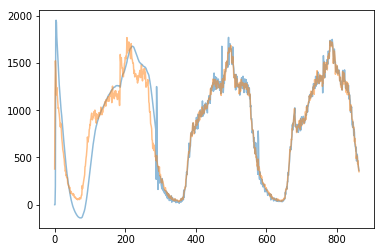

In [60]:
plt.plot(fmodel.forecasts[0], alpha =0.5);
plt.plot(test_data['y'].iloc[:24 * 3 * 12].values, alpha = 0.5);

In [64]:
pred = fmodel.get_prediction()
fcast = fmodel.get_forecast(steps=12*12)

(0, 2000)

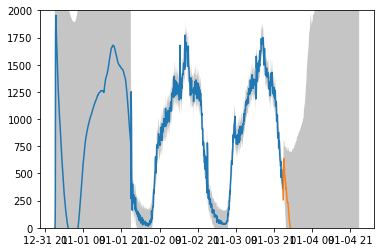

In [67]:

plt.plot(pred.predicted_mean)
plt.fill_between(
            pred.conf_int()['lower y'].index,
            pred.conf_int()['lower y'],
            pred.conf_int()['upper y'],
            facecolor='gray', interpolate=True, alpha=0.45,
        )


plt.plot(fcast.predicted_mean)
plt.fill_between(
            fcast.conf_int()['lower y'].index,
            fcast.conf_int()['lower y'],
            fcast.conf_int()['upper y'],
            facecolor='gray', interpolate=True, alpha=0.45,
        )

plt.ylim(0,2000)

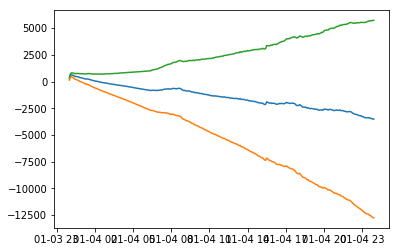

In [66]:
fcast = fmodel.get_forecast(steps=24*12)
plt.plot(fcast.predicted_mean)
plt.plot(fcast.conf_int()['lower y'])
plt.plot(fcast.conf_int()['upper y'])